# Финальное задание

## Предсказание победителя в игре Dota 2

### Подход 1: градиентный бустинг "в лоб"
Один из самых универсальных алгоритмов, изученных в нашем курсе, является градиентный бустинг. Он не очень требователен к данным, восстанавливает нелинейные зависимости, и хорошо работает на многих наборах данных, что и обуславливает его популярность. Вполне разумной мыслью будет попробовать именно его в первую очередь.

1. Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
2. Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.
3. Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.
3. Какой столбец содержит целевую переменную? Запишите его название.
4. Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?
2. Как называется столбец, содержащий целевую переменную?
3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.
4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?


##### Рекомендации и советы

- Если все работает очень медлено:
   - Используйте для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество — например, половину объектов. Подмножество лучше всего брать случайным, а не формировать его из первых m объектов.
   - Попробуйте упростить модель — например, уменьшить глубину деревьев в градиентом бустинге (max_depth).
   
##### Измерение времени работы кода
```python
import time
import datetime

start_time = datetime.datetime.now()

time.sleep(3) # вместо этой строчки разместить замеряемый код

print 'Time elapsed:', datetime.datetime.now() - start_time
```

#### <span style="color:blue">Вопрос 1</span>

<span style="color:blue">1.1. Какие признаки имеют пропуски среди своих значений?</span> 

<span style="color:blue">1.2. Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?</span>

In [1]:
# Загружаем исходные данные 
import pandas
features_src = pandas.read_csv('./features.csv', index_col='match_id')
features_src.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16,2449,0,4,1974,3,63


In [2]:
# Удаляем признаки-подсказки, "заглядывающие" в будущее

excl_cols = ['duration','radiant_win','tower_status_radiant','tower_status_dire',
             'barracks_status_radiant','barracks_status_dire']

features = features_src.drop(excl_cols, axis=1)
features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35,103,-84,221,3,4,2,2,-52
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20,149,-84,195,5,4,3,1,-5
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39,45,-77,221,3,4,3,1,13
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30,124,-80,184,0,4,2,0,27
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46,182,-80,225,6,3,3,0,-16


#### <span style="color:blue">Ответ 1.1</span>
<span style="color:blue">Признаки, имеющие пропуски среди своих значений:</span>

In [3]:
# Ищем столбцы с пропусками 

print "Всего строк в данных:", features.shape[0], "\n"

cnt = features.count()
cnt_na = cnt[cnt<features.shape[0]]
print "Признаки с пропусками (в них количество непустых значений меньше числа строк в данных):\n"
print cnt_na 

Всего строк в данных: 97230 

Признаки с пропусками (в них количество непустых значений меньше числа строк в данных):

first_blood_time               77677
first_blood_team               77677
first_blood_player1            77677
first_blood_player2            53243
radiant_bottle_time            81539
radiant_courier_time           96538
radiant_flying_courier_time    69751
radiant_first_ward_time        95394
dire_bottle_time               81087
dire_courier_time              96554
dire_flying_courier_time       71132
dire_first_ward_time           95404
dtype: int64


In [4]:
# Смотрим на значения двух столбцов с пропусками
cols_with_na = cnt_na.keys()
features[cols_with_na[:2]]

,first_blood_time,first_blood_team
match_id,,
0,7,1
1,54,1
2,224,0
3,NaN,NaN
4,-21,1
5,78,1
8,-34,1
9,NaN,NaN
11,-18,1


#### <span style="color:blue">Ответ 1.2</span>
<span style="color:blue">По всей видимости, событие 'первая кровь' не случилось в первые 5 минут, и, чтобы отличать
отсутствие события от содержательных числовых значений, время события и участвующая в нем команда заполнены **NaN**</span>.

In [5]:
# Заполняем все пропуски нулями и убеждаемся, что столбцов с пропусками не осталось
X = features.fillna(0)
cnt_X = X.count()
print "Количество полей с пропусками: ", cnt_X[cnt_X<X.shape[0]].shape[0]

Количество полей с пропусками:  0


#### <span style="color:blue">Вопрос 2</span>
<span style="color:blue">Как называется столбец, содержащий целевую переменную?</span>

In [6]:
# Выделяем целевой признак в отдельную переменную
y = features_src['radiant_win']
print y[:10]

match_id
0     1
1     1
2     0
3     0
4     0
5     0
8     0
9     1
11    0
12    0
Name: radiant_win, dtype: int64


#### <span style="color:blue">Ответ 2</span>
<span style="color:blue">Целевой признак -- **radiant_win**: 1, если победила команда Radiant, 0 — иначе</span>

#### <span style="color:blue">Вопрос 3</span>

<span style="color:blue">3.1. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями?</span> 

<span style="color:blue">3.2. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.</span>

Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". 

Оцениваем время и качество обучения класифкатора градиентным бустингом (`GradientBoostingClassifier`). Качесто оцениваем с помощью 5-сегментной кросс-валидации, пробуя при этом разное количество деревьев (протестируем следующие значения для количества деревьев: `10, 20, 30`).

In [7]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import KFold
from sklearn import cross_validation
import time
import datetime

N = y.shape[0]
nfolds = 5
folds = KFold(N, n_folds=nfolds, shuffle=True)

n_estims = [10,20,30]
scores = []
times = []

print "Деревьев\tВремя кросс-валидации\tROC-AUC"

for n_estim in n_estims:
    gbc=GradientBoostingClassifier(n_estimators=n_estim, verbose=False)
    gbc.fit(X, y)
        
    start_time = datetime.datetime.now()

    cv_score=cross_validation.cross_val_score(gbc, X, y, scoring='roc_auc', cv=folds)

    times.append(datetime.datetime.now() - start_time)
    scores.append(cv_score.mean()) 

    print n_estim, "\t\t", times[-1], "\t\t", scores[-1]

Деревьев	Время кросс-валидации	ROC-AUC
10 		0:00:38.523710 		0.665449063465
20 		0:01:35.991130 		0.682095244378
30 		0:04:45.396700 		0.689271041255


#### <span style="color:blue">Ответ 3.1</span>
<span style="color:blue">Время кросс-валидации для градиентного бустинга с 30 деревьями:</span> 

In [8]:
print times[-1]

0:04:45.396700


#### <span style="color:blue">Ответ 3.2</span>
<span style="color:blue">Значение метрики ROC-AUC для классификатора на основе градиентного бустинга с 30 деревьями в ансамбле:</span>

In [9]:
print scores[-1]

0.689271041255


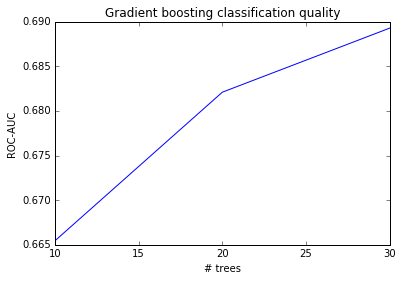

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(n_estims,scores)
plt.title('Gradient boosting classification quality')
plt.xlabel('# trees')
plt.ylabel('ROC-AUC')
plt.show()  


#### <span style="color:blue">Вопрос 4</span>

<span style="color:blue">4.1. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге?</span> 

<span style="color:blue">4.2. Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?</span>

Классификаторы настраивались относительно недолго. При этом качество классификации растет с увеличением кличества деревьев (`n_estimators`), поскольку градиентный бустинг характеризуется отсутствием переобучения с ростом числа элементарных классификаторов, входящих в ансамбль. Можно попробовать построить больший ансамбль (конечно, с большими затратами времени). Для сокращения времени обучения будем учиться на случайной подвыборке втрое меньшего размера.

In [12]:
# Строим случайную подвыборку в 3 раза короче исходной
from random import sample
s = sample(X.index, X.shape[0]/3)
Xs = X.loc[s]
ys = y.loc[s]

N=ys.shape[0]
nfolds=5
folds = KFold(N, n_folds=nfolds, shuffle=True)
    
# На порядок увеличим количество деревьев в ансамбле
n_estims = [100, 200, 300]
scores = []
times = []

print "Деревьев\tВремя обучения\t\tROC-AUC"

for n_estim in n_estims:

    gbc=GradientBoostingClassifier(n_estimators=n_estim, verbose=False)
    gbc.fit(Xs, ys)
    
    start_time = datetime.datetime.now()

    cv_score=cross_validation.cross_val_score(gbc, Xs, ys, scoring='roc_auc', cv=folds)

    times.append(datetime.datetime.now() - start_time)
    scores.append(cv_score.mean()) 

    print n_estim, "\t\t", times[-1], "\t\t", scores[-1]

Деревьев	Время обучения		ROC-AUC
100 		0:01:39.357661 		0.704273074108
200 		0:03:16.556631 		0.710636176044
300 		0:04:53.081658 		0.712489074454


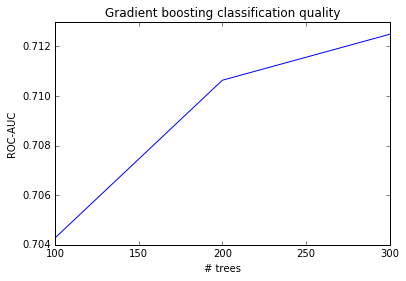

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(n_estims,scores)
plt.title('Gradient boosting classification quality')
plt.xlabel('# trees')
plt.ylabel('ROC-AUC')
plt.show() 

#### <span style="color:blue">Ответ 4.1</span>
<span style="color:blue">Как видно из предыдущего графика, при использовании градиентного бустинга в этой задаче имеет смысл использовать больше 30 деревьев, т.к. качество классификации возрастает с увеличением классифкаторов в ансамбле и слабой склонностью градиентного бустинга к переобучению. Однако точное количество деревьев имеет смысл выбирать, исходя из приемлемости соотношения "временные затраты"/"прирост качества классификации", которое с некоторого момента насыщается (выходит на плато).</span> 

#### <span style="color:blue">Ответ 4.2</span>
<span style="color:blue">Для сокращения времени обучения классификатора градиентным бустингом при большом количестве элементарных классификаторов (деревьев) можно </span>
* <span style="color:blue">использовать в качестве обучающей выборки не все доступные данные, а некоторую случайную подвыборку;</span>
* <span style="color:blue">упростить элементарные классификаторы (уменьшить глубину деревьев).</span> 

### Подход 2: логистическая регрессия

Линейные методы работают гораздо быстрее композиций деревьев, поэтому кажется разумным воспользоваться именно ими для ускорения анализа данных. Одним из наиболее распространенных методов для классификации является логистическая регрессия.

**Важно:** не забывайте, что линейные алгоритмы чувствительны к масштабу признаков! Может пригодиться sklearn.preprocessing.StandartScaler.

1. Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?
3. На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).
4. Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.
5. Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?
6. Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?
3. Сколько различных идентификаторов героев существует в данной игре?
4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?
5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?


##### Код для формирования "мешка слов" по героям
```python
# N — количество различных героев в выборке
X_pick = np.zeros((data.shape[0], N))

for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
```

#### <span style="color:blue">Вопрос 1</span>

<span style="color:blue">1.1. Какое качество получилось у логистической регрессии над всеми исходными признаками?  </span> 

<span style="color:blue">1.2. Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу?</span>

<span style="color:blue">1.3. Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?</span>

Построим логистическую регрессию над всеми исходными признаками, кроме признаков-подсказок, заглядывающих в будущее.

In [5]:
# Загружаем исходные данные
import pandas
features_src = pandas.read_csv('./features.csv', index_col='match_id')
features_src.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16,2449,0,4,1974,3,63


In [6]:
# Удаляем признаки-подсказки, "заглядывающие" в будущее

excl_cols = ['duration','radiant_win','tower_status_radiant','tower_status_dire',
             'barracks_status_radiant','barracks_status_dire']

features = features_src.drop(excl_cols, axis=1)
features.head()


#excl_cols = ['duration','radiant_win','tower_status_radiant','tower_status_dire','barracks_status_radiant',
#       'barracks_status_dire','lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero',
#                             'd1_hero','d2_hero','d3_hero','d4_hero','d5_hero']

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35,103,-84,221,3,4,2,2,-52
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20,149,-84,195,5,4,3,1,-5
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39,45,-77,221,3,4,3,1,13
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30,124,-80,184,0,4,2,0,27
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46,182,-80,225,6,3,3,0,-16


In [10]:
# Заполняем все пропуски нулями
X = features.fillna(0)

In [13]:
# Автошкалируем данные, т.к. для линейных моделей критична единая шкала значений признаков
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X=scaler.transform(X)

In [11]:
# Целевой признак: radiant_win: 1, если победила команда Radiant, 0 — иначе
y = features_src['radiant_win']

In [18]:
# Строим и проверяем кросс-валидацией логистическую регрессию по метрике ROC-AUC
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn import cross_validation
import time
import datetime

N=y.shape[0]
nfolds=5
folds = KFold(N, n_folds=nfolds, shuffle=True)

Cvals = [100, 10, 1, 0.1, 0.01, 0.001]
scores = []
times = []

print "C\t\tВремя кросс-валидации\tROC-AUC"

# Пробуем примитивную оптимизацию по параметру C перебором на заданной нерегулярной сетке
for i, C in enumerate(Cvals):
    
    
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l2_LR.fit(X, y)

    start_time = datetime.datetime.now()

    cv_score=cross_validation.cross_val_score(clf_l2_LR, X, y, scoring='roc_auc', cv=folds)
    
    times.append(datetime.datetime.now() - start_time)
    scores.append(cv_score.mean()) 

    print C, "\t\t", times[-1], "\t\t", scores[-1]

C		Время кросс-валидации	ROC-AUC
100 		0:00:09.268957 		0.716336596034
10 		0:00:10.207131 		0.716336626747
1 		0:00:10.236585 		0.716336983629
0.1 		0:00:10.085420 		0.716340728435
0.01 		0:00:09.236329 		0.716358456189
0.001 		0:00:08.156380 		0.716211925853


#### <span style="color:blue">Ответ 1.1</span>
<span style="color:blue">Качество классификации логистической регрессией "в лоб" над всеми исходными признаками по критерию ROC-AUC:</span> 

In [28]:
maxscore = np.max(scores)
Copt = Cvals[np.argmax(scores)]
print "ROC-AUC =", maxscore 
print "  при C =", Copt

ROC-AUC = 0.716358456189
  при C = 0.01


#### <span style="color:blue">Ответ 1.2</span>
<span style="color:blue">Классификация логистической регрессией над всеми исходными признаками дает несколько лучший результат (**ROC-AUC = 0.7164**), чем лучшая из моделей, построенных градиентным бустингом (**ROC-AUC = 0.7087**). Более низкое качество, обеспечиваемое градиентным бустингом, отчасти может объясняться тем, что основой ансамбля в бустинге являются деревья решений, которые могут разделять классы лишь полуплоскостями, параллельными координатным плоскостям признакового пространства. Логистическая регрессия может лучше аппроксимировать границу между классами. Отчасти разница в качестве может объясняться недостаточно значительными усилиями в оптимизации модели градиентного бустинга.</span> 

#### <span style="color:blue">Ответ 1.3</span>
<span style="color:blue">Модель логистической регрессии существенно быстрее градиентного бустинга -- примерно на порядок в нашем случае.

#### <span style="color:blue">Вопрос 2</span>

<span style="color:blue">2.1. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)?  </span> 

<span style="color:blue">2.2. Чем вы можете объяснить это изменение?</span>

Построим набор данных без категориальных признаков. И повторим построение логистической регрессии. 

In [30]:
# Удалим из исходного набора данных признаки-подсказки и категориальные признаки.
excl_cols = ['duration','radiant_win','tower_status_radiant','tower_status_dire',
             'barracks_status_radiant', 'barracks_status_dire',
             'lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero',
                          'd1_hero','d2_hero','d3_hero','d4_hero','d5_hero']
features = features_src.drop(excl_cols, axis=1)

# Заполняем все пропуски нулями
X = features.fillna(0)

# Автошкалируем данные, т.к. для линейных моделей критична единая шкала значений признаков
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X=scaler.transform(X)

In [31]:
# Строим и проверяем кросс-валидацией логистическую регрессию по метрике ROC-AUC
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn import cross_validation
import time
import datetime

N=y.shape[0]
nfolds=5
folds = KFold(N, n_folds=nfolds, shuffle=True)

Cvals = [100, 10, 1, 0.1, 0.01, 0.001]
scores2 = []
times2 = []

print "C\t\tВремя кросс-валидации\tROC-AUC"

# Пробуем примитивную оптимизацию по параметру C перебором на заданной нерегулярной сетке
for i, C in enumerate(Cvals):
    
    
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l2_LR.fit(X, y)

    start_time = datetime.datetime.now()

    cv_score=cross_validation.cross_val_score(clf_l2_LR, X, y, scoring='roc_auc', cv=folds)
    
    times2.append(datetime.datetime.now() - start_time)
    scores2.append(cv_score.mean()) 

    print C, "\t\t", times2[-1], "\t\t", scores2[-1]

C		Время кросс-валидации	ROC-AUC
100 		0:00:18.149325 		0.716369975524
10 		0:00:19.780479 		0.716369980843
1 		0:00:18.244035 		0.716370134461
0.1 		0:00:17.584473 		0.716375745144
0.01 		0:00:17.839876 		0.716386768283
0.001 		0:00:18.591564 		0.716241545328


In [78]:
# Выберем наилучший результат
maxscore2 = np.max(scores2)
Copt2 = Cvals[np.argmax(scores2)]
print "ROC-AUC =", maxscore2 
print "  при C =", Copt2

ROC-AUC = 0.716386768283
  при C = 0.01


#### <span style="color:blue">Ответ 2.1</span>
<span style="color:blue">Качество логистической регрессии без категориальных признаков, практически, не изменилось:
* <span style="color:blue">было **ROC-AUC = 0.716358456189**,</span> 
* <span style="color:blue">стало **ROC-AUC = 0.716386768283**).</span>

#### <span style="color:blue">Ответ 2.2</span>
<span style="color:blue">Это говорит о бесполезности категориальных переменных в исходной форме (дискртено кодированных номинальных переменных). Для логистической регрессии необходимо бинарное кодирование дискретных значений категориальных переменных для описания эффекта переключения на другое значение отдельным признаком ("мешок слов").</span>

#### <span style="color:blue">Вопрос 3</span>

<span style="color:blue">Сколько различных идентификаторов героев существует в данной игре? </span> 


In [71]:
hero_cols =['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero',
            'd1_hero','d2_hero','d3_hero','d4_hero','d5_hero']

id_hero = []
for hero_col in hero_cols:
    id_hero = np.hstack((id_hero, features_src[hero_col].unique()))   

n_unique_id = np.unique(id_hero).shape[0]
max_id = int(np.max(id_hero))

print "Различных значений идентфикаторов:", n_unique_id
print "Максимальное значение идентификатора:", max_id

n_heros = max_id

Различных значений идентфикаторов: 108
Максимальное значение идентификатора: 112


#### <span style="color:blue">Ответ 3</span>
<span style="color:blue">Если предположить, что данные содержат все встречающиеся в игре идентификаторы героев, то количество уникальных значений идентификаторов героев равно **108** (см. код и результат выше).</span>

<span style="color:blue">Однако максимальное значение идентификатора, встречающееся в данных, равно **112**. Это может говорить о том, что некоторые из идентифкаторов все-таки отсутствуют в данных. Далее будем использовать именно это число.

#### <span style="color:blue">Вопрос 4</span>

<span style="color:blue">Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?</span> 



Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет `n_heros` различных героев. Сформируем `n_heros` признаков, при этом `i`-й будет равен нулю, если `i`-й герой не участвовал в матче; единице, если `i`-й герой играл за команду Radiant; минус единице, если `i`-й герой играл за команду Dire.

In [72]:
# n_heros — количество различных героев в выборке
X_pick = np.zeros((X.shape[0], n_heros))

for i, match_id in enumerate(features_src.index):
    for p in xrange(5):
        X_pick[i, features_src.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features_src.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

Добавим категориальные признаки, закодированные "мешком слов" к ранее использованным признакам и проведем кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации.

In [80]:
# Добавляем мешок "слов" к некатегориальным данным
XX = np.hstack((X, X_pick))

N=y.shape[0]
nfolds=5
folds = KFold(N, n_folds=nfolds, shuffle=True)

Cvals = [100, 10, 5, 3, 2, 1, 0.5, 0.1, 0.01, 0.001]
scores3 = []
times3 = []

print "C\t\tВремя кросс-валидации\tROC-AUC"

# Пробуем примитивную оптимизацию по параметру C перебором на заданной нерегулярной сетке
for i, C in enumerate(Cvals):    
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l2_LR.fit(XX, y)

    start_time = datetime.datetime.now()

    cv_score=cross_validation.cross_val_score(clf_l2_LR, XX, y, scoring='roc_auc', cv=folds)
    
    times3.append(datetime.datetime.now() - start_time)
    scores3.append(cv_score.mean()) 

    print C, "\t\t", times3[-1], "\t\t", scores3[-1]


C		Время кросс-валидации	ROC-AUC
100 		0:00:15.749187 		0.751752618381
10 		0:00:14.803179 		0.751752981737
5 		0:00:14.988940 		0.751752974281
3 		0:00:15.794732 		0.751753393718
2 		0:00:16.141970 		0.751753548344
1 		0:00:15.584680 		0.75175492671
0.5 		0:00:16.113898 		0.751756782991
0.1 		0:00:16.138632 		0.751777987907
0.01 		0:00:14.875045 		0.75156273309
0.001 		0:00:14.057529 		0.746125843094


In [82]:
# Выберем наилучший результат
maxscore3 = np.max(scores3)
Copt3 = Cvals[np.argmax(scores3)]
print "ROC-AUC =", maxscore3
print "  при C =", Copt3

ROC-AUC = 0.751777987907
  при C = 0.1


 #### <span style="color:blue">Ответ 4</span>
<span style="color:blue">После добавления мешка слов по героям качество классификации логистической регрессией заметно возросло:</span>
* <span style="color:blue">было **ROC-AUC = 0.716386768283**</span>
* <span style="color:blue">стало **ROC-AUC = 0.751777987907**.</span>

<span style="color:blue">Объясняется это улучшение тем, что в заивимости от выбора героев существенно зависит исход игры, т.е. эта информация важна для предсказания и мешоr слов позволил ее адекватно учесть при построении логистической регрессии.</span>


#### <span style="color:blue">Вопрос 5</span>

<span style="color:blue">Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?</span>

Построим предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). 

In [83]:
# Загрузим тестовые данные и перекодируем идентифкатры героев "мешком слов"
features_src_test = pandas.read_csv('./features_test.csv', index_col='match_id')

excl_cols = ['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero',
                             'd1_hero','d2_hero','d3_hero','d4_hero','d5_hero']

features_test = features_src_test.drop(excl_cols, axis=1)

In [85]:
# Заполняем все пропуски нулями 
Xtest = features_test.fillna(0)

In [86]:
# Автошкалируем данные так же, как и при обучении
Xtest=scaler.transform(Xtest)

In [87]:
# Строим мешок слов для тестовых данных
X_pick_test = np.zeros((Xtest.shape[0], n_heros))

for i, match_id in enumerate(features_src_test.index):
    for p in xrange(5):
        X_pick_test[i, features_src_test.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, features_src_test.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

In [89]:
# Склеиваем некатегориальные данные и "мешок слов" для героев
XXtest = np.hstack((Xtest, X_pick_test))

In [92]:
# Строим наилучшую модель 
clf_l2_LR = LogisticRegression(C=Copt3, penalty='l2', tol=0.001)
clf_l2_LR.fit(XX, y)

# Предсказываем вероятности побед для каждой команды
y_pred = clf_l2_LR.predict_proba(XXtest)    
    
# Посмотрим несколько первых значений предсказаний
print y_pred[:10,:]

[[ 0.17626502  0.82373498]
 [ 0.24714102  0.75285898]
 [ 0.81156931  0.18843069]
 [ 0.1384246   0.8615754 ]
 [ 0.76009058  0.23990942]
 [ 0.62671223  0.37328777]
 [ 0.47212611  0.52787389]
 [ 0.43485255  0.56514745]
 [ 0.78599865  0.21400135]
 [ 0.33010509  0.66989491]]


Убедимся, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

In [91]:
# Найдем минимальную и максимальную вероятности победы команды Radiant
print "Минимальная вероятность победы Radiant: ", y_pred[:,1].min()
print "Максимальная вероятность победы Radiant:", y_pred[:,1].max()

Минимальная вероятность победы Radiant:  0.008456378992
Максимальная вероятность победы Radiant: 0.996366484875


#### <span style="color:blue">Ответ 5</span>
<span style="color:blue">Предсказанные значения вероятности победы команды Radiant:</span>
* <span style="color:blue">Минимальное:  **0.008456378992**</span>
* <span style="color:blue">Максимальное: **0.996366484875**.</span>


In [93]:
# Запишем пресказания в CSV-файл для отправки на kaggle.com
idx=features_src_test.index.get_values()
d = {'match_id' : idx, 'radiant_win' : y_pred[:,1]}
df = pandas.DataFrame(d)
df.to_csv('radiant_win.txt', sep=',',index=False)
